# Pat's startup

# Product and market


Our product is a straightforward, AI-driven tool for optimizing pricing in Series A/B SaaS companies. It quickly determines the most profitable prices, addressing key challenges faced by CEOs in this sector.

**Core Functionality**
Uses AI and econometrics to set Bayes-optimal prices.
Delivers results in minutes, not months.

**Problem's Solved:**
Tackles the opportunity cost of ineffective pricing.
Eliminates the need for expensive consultants.
Reduces the risk of revenue loss or growth slowdown due to poor pricing.

**User Experience:**
Designed for ease of use, making complex pricing strategies accessible.
Addresses concerns about data privacy and method trustworthiness.

**Risk Management:**
Offers a money-back guarantee if it doesn't lead to immediate revenue uplift.
Demonstrated effectiveness through case studies from companies X, Y, and Z.

This tool empowers CEOs to make informed, data-backed pricing decisions efficiently, ensuring competitiveness in a fast-paced market.

# Problem definition

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes and edges
nodes = ["Price", "Choice", "Product Attributes", "Macro", "Budget Constraint", "Error Term"]
edges = [
    ("Price", "Choice"),
    ("Product Attributes", "Choice"),
    ("Product Attributes", "Price"),
    ("Macro", "Budget Constraint"),
    ("Budget Constraint", "Choice"),
    ("Error Term", "Choice")
]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define positions for a DAG-like structure
pos = {
    "Price": (1, 1),
    "Choice": (2, 0),
    "Product Attributes": (0, 0),
    "Macro": (0, -1),
    "Budget Constraint": (1, -1),
    "Error Term": (3, 0)
}

# Define edge colors
edge_colors = ["green" if edge == ("Price", "Choice") else "red" for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color=edge_colors, arrows=True, width=2, node_size=3000, font_size=10)
plt.title("Pricing Problem (DAG) with Error Term")
plt.show()


# Value of information

### Under expected utility theory


**Risk-Averse Utility Function:**  

$$ U(\pi) = -e^{-a\pi} $$

- $\pi$ is the expected payoff.
- $a > 0$ is a parameter indicating the degree of risk aversion.
- Higher $a$ implies greater risk aversion.
- This function shows diminishing marginal utility of wealth.

**Risk-Seeking Utility Function:**  

$$ U(\pi) = e^{b\pi} $$

- $\pi$ is the expected payoff.
- $b > 0$ indicates a propensity towards risk-seeking behavior.
- Higher $b$ implies greater risk-seeking.
- This function shows increasing marginal utility with wealth.

**Utility Function Considering Risk:**  

$$ U(\pi, \sigma) = \pi - \frac{\lambda \sigma^2}{2} $$

- $\pi$ is the expected payoff.
- $\sigma$ represents the risk (standard deviation or variance of the payoff).
- $\lambda$ represents the degree of risk aversion.
- Higher $\lambda$ indicates greater risk aversion.
- This function captures a trade-off between expected payoff and associated risk.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed expected payoff (pi)
pi = 10

# Range of standard deviations (sigma) limited to a maximum of 4
sigmas_reduced = np.linspace(0, 4, 100)

# Different values of lambda for risk aversion
lambdas = [0.5, 1, 1.5, 2]

# Normalized utility calculation
def normalized_utility(pi, sigma, lambda_val):
    risk_free_utility = pi - (lambda_val * 0**2) / 2  # Utility at sigma = 0
    return (pi - (lambda_val * sigma**2) / 2) * 100 / risk_free_utility

# Plotting the normalized utility function with reduced sigma range
plt.figure(figsize=(10, 6))
for lambda_val in lambdas:
    normalized_util = normalized_utility(pi, sigmas_reduced, lambda_val)
    plt.plot(sigmas_reduced, normalized_util, label=f'λ = {lambda_val}')

plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Normalized Utility (U)')
plt.title('Normalized Utility Function with σ up to 4 for Different Levels of Risk Aversion')
plt.legend()
plt.grid(True)
plt.show()


### Under prospect theory

To calculate the value of a lottery under Prospect Theory for a decision maker with a reference payoff $\pi$, let's consider a lottery that offers a Gaussian-distributed payoff with an expected value $\pi + \Delta$ and standard deviation $\sigma$. We'll go through this in two steps: first, transforming the probabilities, and then applying the value function.

**Step 1: Transforming the Probabilities**

The lottery's payoff distribution is Gaussian. The decision maker perceives these probabilities through a distorted lens due to the probability weighting function. If $f(x)$ is the probability density function of the Gaussian distribution, the transformed probability density function $g(x)$ would be:

$$ g(x) = w(f(x)) $$

where $w(p)$ is the probability weighting function of Prospect Theory. A common form for this function is:

$$ w(p) = \frac{p^\gamma}{(p^\gamma + (1 - p)^\gamma)^{1/\gamma}} $$

with $\gamma$ typically less than 1, reflecting the distortion in perception of probabilities.

**Step 2: Applying the Value Function**

Next, we apply the value function to each outcome. Let $v(x)$ be the Prospect Theory value function relative to the reference point $\pi$. For a given outcome $x$, the gain or loss relative to $\pi$ is $x - \pi$. The value function might take the form:

$$
v(x - \pi) = 
\begin{cases} 
(x - \pi)^\alpha & \text{if } x \geq \pi \\
- \lambda \cdot (- (x - \pi))^\beta & \text{if } x < \pi
\end{cases}
$$

where $\alpha$ and $\beta$ capture diminishing sensitivity, and $\lambda$ represents loss aversion.

**Valuing the Lottery**

The overall value of the lottery under Prospect Theory would be the expectation of the value function applied to the outcomes, weighted by the transformed probabilities. Mathematically, this is:

$$ E[v] = \int_{-\infty}^{\infty} v(x - \pi) \cdot g(x) \, dx $$

This integral calculates the expected utility of the lottery, taking into account both the distortion of probabilities and the asymmetric valuation of gains and losses relative to the reference point.


# Discrete choice and random utility models


### General specification

Discrete choice models the probability of a consumer choosing $j$ MECE choices as a function of some attribute. A natural attribute is price.
In the context product choice, this usually means an $N+1$-dimesional demand system with $N$ inside goods and 1 additional 'Other' or 'No purchase' option.

In the eyes of the decision maker, each choice $i$ is associated with a utility $U_i$. The decision maker will choose the alternative with the highest $U$.

However, $U$ is not entirely determinstic, so the 'choice' is expressed as a probability distribution over the alternatives. Total utility $U$ can be decomposed into a deterministic component $V_j$ (observable to researcher), and an unobserved random variable $\epsilon_j$ which is Gumbel distributed.

Define the utility for each individual $n$ and alternative $i$:
$$
U_{ni} = \mathbf{X}_{ni} \boldsymbol{\beta}_n + \epsilon_{ni}
$$
where:
- $\mathbf{X}_{ni}$ is a vector of observed variables for alternative $i$ and individual $n$.
- $\boldsymbol{\beta}_n$ is a vector of coefficients, varying across individuals according to some distribution.
- $\epsilon_{ni}$ is the random error term for individual $n$ and alternative $i$, typically i.i.d. and following a Gumbel distribution.


The probability of choosing option $i$, denoted as $P(i)$, is the probability that $U_i$ is greater than $U_j$ for all $j \neq i$. Mathematically, this is expressed as:
$$ P(i) = P(U_i > U_j \, \text{for all} \, j \neq i) $$
Expanding this, we get:
$$ P(i) = P(V_i + \varepsilon_i > V_j + \varepsilon_j \, \text{for all} \, j \neq i) $$

In decision-theoretic notation, this can be expressed as the probability that option $i$ is strictly preferred to all other options $j$, for each $j \neq i$
$$ P(i) = P(\succ_i \text{ over all } j \neq i) $$
Expanding this in terms of utility components, where $U_i$ represents the utility of option $i$ and $U_j$ represents the utility of option $j$, and considering both deterministic ($V$) and random ($\varepsilon$) components, we get:
$$ P(i) = P(V_i + \varepsilon_i \succ V_j + \varepsilon_j \, \text{for all } j \neq i) $$

Here, $\succ$ denotes the strict preference relation, indicating that the utility (and thus the preference) for option $i$ is greater than that for any other option $j$. The deterministic component $V$ reflects the observable attributes and fixed parameters, while $\varepsilon$ captures the unobserved, random factors influencing utility and preference.




Returning to the linear specification of $U$, the random coefficients $\boldsymbol{\beta}_n$ are assumed to vary across individuals according to a distribution, often normal:
$$
\boldsymbol{\beta}_n \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})
$$
where $\boldsymbol{\mu}$ is the mean vector and $\boldsymbol{\Sigma}$ is the covariance matrix of the coefficients.

The Gumbel distribution for the error term $\epsilon_{ni}$ is specified as:
$$
\epsilon_{ni} \sim \text{Gumbel}(\mu_{\epsilon}, \beta_{\epsilon})
$$
where $\mu_{\epsilon}$ is the location parameter and $\beta_{\epsilon}$ is the scale parameter.

The choice probability $P_{ni}$ of individual $n$ choosing alternative $i$ is given by the integral over all possible values of $\boldsymbol{\beta}_n$ and the random error term:
$$
P_{ni} = \int \frac{\exp(U_{ni}(\boldsymbol{\beta}_n, \epsilon_{ni}))}{\sum_{j} \exp(U_{nj}(\boldsymbol{\beta}_n, \epsilon_{ni}))} f(\boldsymbol{\beta}_n) \, d\boldsymbol{\beta}_n
$$
where $f(\boldsymbol{\beta}_n)$ is the density function of $\boldsymbol{\beta}_n$.

Due to the integral and the inclusion of the random error term, the choice probabilities in a Mixed Logit model are typically estimated using simulation methods, such as simulated maximum likelihood.



### Price specification

Define the utility for each individual $n$ and alternative $i$ (with $i = 1, 2, 3$) as a function of price:
$$
U_{ni} = \beta_{ni} \times \text{Price}_{ni} + \epsilon_{ni}
$$
where:
- $\beta_{ni}$ is the coefficient for price for individual $n$ and alternative $i$, varying across individuals.
- $\text{Price}_{ni}$ is the price of alternative $i$ for individual $n$.
- $\epsilon_{ni}$ is the random error term for individual $n$ and alternative $i$, typically i.i.d. and following a Gumbel distribution.

The random coefficients $\beta_{ni}$ for price are assumed to vary across individuals according to a distribution, often normal:
$$
\beta_{ni} \sim \mathcal{N}(\mu_{\beta}, \sigma_{\beta}^2)
$$
where $\mu_{\beta}$ is the mean and $\sigma_{\beta}^2$ is the variance of the price coefficient.

The Gumbel distribution for the error term $\epsilon_{ni}$ is specified as:
$$
\epsilon_{ni} \sim \text{Gumbel}(\mu_{\epsilon}, \beta_{\epsilon})
$$
where $\mu_{\epsilon}$ is the location parameter and $\beta_{\epsilon}$ is the scale parameter.

The choice probability $P_{ni}$ of individual $n$ choosing alternative $i$ is given by the integral over all possible values of $\beta_{ni}$ and the random error term:
$$
P_{ni} = \int \frac{\exp(\beta_{ni} \times \text{Price}_{ni} + \epsilon_{ni})}{\exp(\beta_{n1} \times \text{Price}_{n1} + \epsilon_{n1}) + \exp(\beta_{n2} \times \text{Price}_{n2} + \epsilon_{n2}) + \exp(\beta_{n3} \times \text{Price}_{n3} + \epsilon_{n3})} f(\beta_{ni}) \, d\beta_{ni}
$$
where $f(\beta_{ni})$ is the density function of $\beta_{ni}$.


Due to the integral and the inclusion of the random error term, the choice probabilities in a Mixed Logit model are typically estimated using simulation methods, such as simulated maximum likelihood.



# Substitution and elasticity priors

The generic definition of own-price elasticity is the partial derivative of volume w.r.t. price, scaled by the ratio of price to volume.

$$\epsilon_{ii} = \dfrac{\partial Q_i}{\partial P_i} \dfrac{P_i}{Q_i}$$

Similarly, the definition of cross-price elasticity is the partial derivative of good $j$'s volume w.r.t. good $i$'s price, scaled by the ratio of price to volume.

$$\epsilon_{ij} = \dfrac{\partial Q_i}{\partial P_j} \dfrac{P_j}{Q_i}$$

This does *not* imply symmetry such that $$\epsilon_{ij} = \epsilon_{ji}$$

### Multinomial logit 

The big problem with the logit i

**Own-price elasticity**

The same logic holds for the multinomial logit, except $Q_i$ can be interpreted as the choice probability.


$$\epsilon_{ii} = \dfrac{\partial Q_i}{\partial P_i} \dfrac{P_i}{Q_i}$$


$$\epsilon_{ii} = \beta P_i \cdot (1 - Q_i)$$

Note that there is no injective mapping between the two factors in each equation.
The absolute elasticity strictly increases as a function of price.

**Cross-price elasticity**

$$\epsilon_{ij} = \dfrac{\partial Q_i}{\partial P_j} \dfrac{P_j}{Q_i}$$

$$\epsilon_{ij} = \beta P_j \cdot (0-Q_i)$$

This cross-elasticity is the same for all i: a change in an attribute of alternative j changes the probabilities for all other alternatives by the same percent. This property of the logit cross- elasticities is a manifestation, or restatement, of the IIA property of the
logit choice probabilities.


### Mixed logit

We can respecify the mixed logits utility as 

$$U = \beta x + \mu z + \epsilon$$

We can then refer to the random portion of utility as 

$$ \eta = \mu z + \epsilon $$

For a standard MNL, the covariance of the noise terms is strictly zero.

$$\text{Cov}( \eta_i, \eta_j) = 0 $$

For a mixed logit, the covariance is the expected product of the error terms.

$$\text{Cov}( \eta_i, \eta_j) = \langle  (\mu z + \epsilon)  (\mu z + \epsilon )\rangle $$

where \mu is a random Gaussian noise term with mean 0. Alternatively,

$$\text{Cov}( \eta_i, \eta_j) = z W z $$ 
where $Z$ is the covariance matrix.

Setting $z$ to 1 as a dummy variable is the same as setting up a substitution nest.



# Import

### Import data

Firstly, we bring in our data. We require the user to upload transaction data of all their historical paid conversions. In general, more data is better.

We need five variables:

- An anonymised, unique identifier for the customer
- The name of the product that was purchased
- The price of the product that was purchased
- The number of units of the product purchased
- The revenue of the purchase

If privacy is an issue, we encourage customers to 

In [1]:
def import_data():
    import pandas as pd
    file_path = '/Users/patricksweeney/growth/07_Apps/Pricing app/Disaggregate models/Choice data.xlsx'
    data = pd.read_excel(file_path)
    return data

data = import_data()
data.head()

,id,product,revenue,volume,price
0,02deacf1-5198-483d-9bca-376ad30c22dd,Team,350.0,10,35.0
1,0b669cda-d713-48ee-945f-a76c89620e8d,Team,245.0,7,35.0
2,1ce2906a-f1b7-47a7-8735-f9e8164d0d60,Starter,30.0,3,10.0
3,255bf974-6df8-4b36-8573-08b4df45de6a,Team,375.0,5,75.0
4,27890639-c3f5-40c8-9aa2-b6206a145dbd,Starter,30.0,3,10.0


In [ ]:
print(type(data))
print(type(data['price']))

### Other inputs

Apart from this data, we need a few additional pieces of info, and it's important we collect it in a user-friendly way:
- Total revenue, customers, and users as of today (in case the sample is partial, need it for lift)
- 'Order' of packages (i.e. which one is lowest priced, which one is highest price) — actually, probably can figure this out ourself
- If they're deleting a package, which one are they deleting.
- Which packages are self-serve, which ones are Enterprise.

### Check the data

We check the data to make sure nothing strange is going on. We want to confirm that:
- All IDs are unique
- $R = P \times V$
- $R > 0$
- $P > 0$
- $V > 0$

In [ ]:
def check_data(data):
    # Check for unique IDs
    total_rows = len(data)
    duplicate_ids = total_rows - data['id'].nunique()
    if duplicate_ids > 0:
        duplicate_percentage = (duplicate_ids / total_rows) * 100
        print(f"Warning: {duplicate_percentage:.2f}% of the rows have duplicate IDs.")
    else:
        print("All IDs are unique.")

    # Compare total sum of revenue to sumproduct of price and volume
    total_revenue = data['revenue'].sum()
    total_price_volume = (data['price'] * data['volume']).sum()
    if total_revenue != total_price_volume:
        difference = total_price_volume - total_revenue
        percentage_difference = (difference / total_revenue) * 100
        print(f"Warning: Total P x V is {percentage_difference:.2f}% {'greater' if difference > 0 else 'less'} than total Revenue.")
    else:
        print("Total Revenue equals total Price times Volume.")

    # Check if revenue, price, volume are greater than 0 and calculate percentages
    for column in ['revenue', 'price', 'volume']:
        incorrect_values = data[data[column] <= 0]
        if not incorrect_values.empty:
            incorrect_percentage = (len(incorrect_values) / total_rows) * 100
            print(f"Warning: {incorrect_percentage:.2f}% of {column} values are not greater than 0.")
        else:
            print(f"All {column} values are greater than 0.")

# Example usage
check_data(data)


# Summary statistics

### Business-level summary

The business level summary gives the user a bird's eye view of their business. None of this information should be new to them, but it helps them have faith we've gotten the data properly.

We want to show them a page which confirms the size and main statistics of the sample:

- Total revenue
- Total customers
- Total users
- ARPA
- ARPU

It's probably a good idea for them to enter their total revenue, so we can print all of this out as a percentage. This will also let us calculate lift down the line.  Or maybe we just ask them for everything?

In [ ]:
def revenue_summary(data):
    import pandas as pd

    # Calculate total revenue
    total_revenue = data['revenue'].sum()
    print(f"Total revenue: ${total_revenue:,.2f}")
    print()

    # Calculate total number of distinct customers
    total_customers = data['id'].nunique()
    print(f"Total customers: {total_customers}")

    # Calculate Average Revenue Per Account (ARPA)
    if total_customers > 0:
        arpa = total_revenue / total_customers
        print(f"Average revenue per customer: ${arpa:,.2f}")
    else:
        print("Average revenue per customer: N/A")
    print()

    # Calculate total volume
    total_volume = data['volume'].sum()
    print(f"Total users: {total_volume}")

    # Calculate Average Revenue Per User Account (ARPUA)
    if total_volume > 0:
        arpua = total_revenue / total_volume
        print(f"Average revenue per user: ${arpua:,.2f}")
    else:
        print("Average revenue per user: N/A")
    print()


revenue_summary(data)


### Product-level summary

Next, we want to go one level deeper and summarise each product with plots. For each product, we're after:

- Revenue mix
- Customer mix
- User mix
- ARPA
- ARPU

In [ ]:
def package_summary(data):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Set Seaborn dark theme
    sns.set_theme(style="darkgrid")

    # Helper function to plot bar chart
    def plot_bar_chart(series, title, ylabel, value_format):
        ax = sns.barplot(x=series.index, y=series.values)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        for p in ax.patches:
            ax.annotate(value_format.format(p.get_height()), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points')
        plt.show()

    # Percentage of revenue by product
    revenue_percent = data.groupby('product')['revenue'].sum() / data['revenue'].sum() * 100
    plot_bar_chart(revenue_percent, 'Percentage of Revenue by Product', 'Percentage', '{:.0f}%')

    # Percentage of customers by product
    customer_percent = data.groupby('product')['id'].nunique() / data['id'].nunique() * 100
    plot_bar_chart(customer_percent, 'Percentage of Customers by Product', 'Percentage', '{:.0f}%')

    # Percentage of users by product
    user_percent = data.groupby('product')['volume'].sum() / data['volume'].sum() * 100
    plot_bar_chart(user_percent, 'Percentage of Users by Product', 'Percentage', '{:.0f}%')

    # ARPA by package
    arpa_by_package = data.groupby('product')['revenue'].sum() / data.groupby('product')['id'].nunique()
    plot_bar_chart(arpa_by_package, 'ARPA by Package', 'ARPA ($)', '${:.0f}')

    # ARPU by package
    arpu_by_package = data.groupby('product')['revenue'].sum() / data.groupby('product')['volume'].sum()
    plot_bar_chart(arpu_by_package, 'ARPU by Package', 'ARPU ($)', '${:.0f}')

package_summary(data)


### Statistical distributions

We are interested in the best fitting distribution of price and volume to see how well-behaved the system we're dealing with is.

In [ ]:
def fit_distributions(data):
    import pandas as pd
    import numpy as np
    from scipy.stats import entropy
    from fitter import Fitter

    def calculate_cov_and_normalized_entropy(data):
        cv = np.std(data) / np.mean(data)
        # Normalizing the entropy
        sh_entropy = entropy(np.histogram(data, bins=30)[0], base=2)
        max_entropy = np.log2(len(np.unique(data)))
        normalized_entropy = sh_entropy / max_entropy if max_entropy > 0 else 0
        return cv, normalized_entropy

    def find_best_fit_distribution(data):
        f = Fitter(data, distributions=['gamma', 'lognorm', 'beta', 'expon', 'norm'])
        f.fit()
        best_fit = f.get_best(method='sumsquare_error')
        best_distr_name = list(best_fit.keys())[0]
        return best_distr_name

    products = data['product'].unique()

    for product in products:
        product_data = data[data['product'] == product]
        
        # Price Analysis
        price_cv, price_normalized_entropy = calculate_cov_and_normalized_entropy(product_data['price'])
        price_best_fit = find_best_fit_distribution(product_data['price'])
        print(f'Product: {product}, Price - CoV: {price_cv:.2f}, Normalized Entropy: {price_normalized_entropy:.2f}, Best Fit: {price_best_fit}')

        # Volume Analysis
        volume_cv, volume_normalized_entropy = calculate_cov_and_normalized_entropy(product_data['volume'])
        volume_best_fit = find_best_fit_distribution(product_data['volume'])
        print(f'Product: {product}, Volume - CoV: {volume_cv:.2f}, Normalized Entropy: {volume_normalized_entropy:.2f}, Best Fit: {volume_best_fit}')

fit_distributions(data)


# Data processing

### Add the 'No-Purchase' option

If a business has $N$ packages, this is not a MECE choice set as there is always the option to purchase nothing (or churn).  
Therefore we require $N+1$ goods in the demand system.

We can back out the proportion of 'No-purchase' directly from the business's paid conversion rate.  If we started with $n$ observed paid conversions (choices),

$$Paid \space CVR = \dfrac{n}{N}$$

$$N = \dfrac{n}{ Paid \space CVR}$$

we can get the total number of choices (including no-purchase choices) by dividing $n$ by the paid conversion rate.


In [2]:
def add_nopurchase_option(data, retention_rate, aupa):
    import pandas as pd
    import numpy as np
    import uuid
    
    # Calculate the number of 'Other' rows to add
    current_count = len(data)
    total_count_needed = current_count / retention_rate
    other_count = int(total_count_needed - current_count)

    # Create a DataFrame for 'Other' choices
    other_data = pd.DataFrame({
        'product': ['Other'] * other_count,
        'price': [0] * other_count,
        'volume': np.random.geometric(1/aupa, size=other_count),
        # Add other columns as None
    })

    # Add other columns as None
    for col in data.columns:
        if col not in other_data:
            other_data[col] = np.nan

    # Generate unique UUIDs for the new rows
    other_data['id'] = [str(uuid.uuid4()) for _ in range(other_count)]

    # Append the 'Other' data to the original data
    updated_data = pd.concat([data, other_data], ignore_index=True)

    # Print the number of rows and the number of unique IDs
    print(f"Total number of rows: {len(updated_data)}")
    print(f"Number of unique IDs: {updated_data['id'].nunique()}")

    return updated_data

# Example usage
data = add_nopurchase_option(data, 0.96, 6.64)
data.head()
data.tail()

Total number of rows: 4296
Number of unique IDs: 4296


,id,product,revenue,volume,price
4291,0773557e-ad65-4afc-a9ca-3510f78f8193,Other,NaN,1,0.0
4292,e3de9ac5-a026-4744-9b91-23b9866d7769,Other,NaN,4,0.0
4293,02b2239c-dd12-4ded-bebf-0b7e23a65e8d,Other,NaN,9,0.0
4294,eb5744d6-c97b-4e58-99ff-75a85bfc8951,Other,NaN,3,0.0
4295,10a1e4ad-f85f-4c9b-9ca7-3b0b3835e7c9,Other,NaN,3,0.0


### Duplicate choices with volume > 1

We have two options for dealing with the fact that people purchase differing volumes of different packages:
1. Fit a discrete model
2. Treat incremental volume > 1 as a fresh choice which is repeated with no alternatives
3. Treat incremental volume > 1 as a fresh choice which is repeated with no alternatives as an unbalanced panel

We opt for option 2.


In [3]:
def duplicate_volume_choices(data):
    import pandas as pd
    import uuid

    # Ensure the original data has the 'available' column set to 1
    data['available'] = 1

    # Add a 'panel' column with unique UUIDs
    data['panel'] = [uuid.uuid4() for _ in range(len(data))]

    # Create an empty DataFrame to store the results
    result_df = pd.DataFrame()

    # Iterate over each row
    for index, row in data.iterrows():
        row_volume = row['volume']  # Directly reference the 'volume' column
        
        # Check if volume is greater than 1
        if row_volume > 1:
            # Duplicate the row volume - 1 times and set 'available' to 0
            row_copy = row.copy()
            row_copy['available'] = 1
            duplicates = pd.DataFrame([row_copy] * (int(row_volume) - 1))
            result_df = pd.concat([result_df, duplicates], ignore_index=True)
    
    # Combine the original data with the duplicated rows
    return pd.concat([data, result_df], ignore_index=True)


data = duplicate_volume_choices(data)
data.head()
print(f"Total number of rows: {len(data)}")


Total number of rows: 28530


### Index choices

Turn the product names into 1,2,3,4,5.

In [6]:
def index_choices(data):
    # Import the pandas library
    import pandas as pd

    # Dictionary for mapping product names to indices
    mapping_dict = {
        'Starter': 1,
        'Team': 2,
        'Business': 3,
        'Enterprise': 4,
        'Other': 5
    }

    # Map the 'product' column to the new 'choice_index' column
    data['choice_index'] = data['product'].map(mapping_dict)

    return data

data = index_choices(data)
data.head()

,id,product,revenue,volume,price,available,panel,choice_index
0,02deacf1-5198-483d-9bca-376ad30c22dd,Team,350.0,10,-0.165142,1,9978e66e-6b23-44c7-afa9-bd54578f20fc,2
1,0b669cda-d713-48ee-945f-a76c89620e8d,Team,245.0,7,-0.165142,1,e66fdb66-82d3-4d9f-81a8-1c38a62d5dfa,2
2,1ce2906a-f1b7-47a7-8735-f9e8164d0d60,Starter,30.0,3,-0.802238,1,a6963d26-0aa3-49e4-861b-109bf4c2df95,1
3,255bf974-6df8-4b36-8573-08b4df45de6a,Team,375.0,5,0.854213,1,f8b590be-b05d-4354-8752-730717cda86d,2
4,27890639-c3f5-40c8-9aa2-b6206a145dbd,Starter,30.0,3,-0.802238,1,072ff7fa-0171-40d7-9549-a4d89c987caa,1


### Standardize

In [4]:
def standardize_price(data):
    import pandas as pd
    
    if 'price' not in data.columns:
        raise ValueError("The 'price' column is not found in the data.")

    mean_price = data['price'].mean()
    std_price = data['price'].std()

    # Avoid division by zero in case of constant price
    if std_price == 0:
        raise ValueError("Standard deviation of 'price' is zero. Cannot standardize a constant variable.")

    old_price_sample = data['price'].iloc[0]  # Take a sample price for comparison
    data['price'] = (data['price'] - mean_price) / std_price
    new_price_sample = data['price'].iloc[0]  # Corresponding standardized price

    # Calculate the scaling factor
    scaling_factor = new_price_sample / old_price_sample if old_price_sample != 0 else 0

    print(f"Mean (mu): {mean_price:.2f}, Standard Deviation (sigma): {std_price:.2f}")
    print(f"Price has been scaled by a factor of: {scaling_factor:.2f}")

    return data, scaling_factor, mean_price, std_price

# Example usage
data, scaling_factor, scaler_mu, scaler_sigma = standardize_price(data)

data.head()


Mean (mu): 41.48, Standard Deviation (sigma): 39.24
Price has been scaled by a factor of: -0.00


,id,product,revenue,volume,price,available,panel
0,02deacf1-5198-483d-9bca-376ad30c22dd,Team,350.0,10,-0.165142,1,9978e66e-6b23-44c7-afa9-bd54578f20fc
1,0b669cda-d713-48ee-945f-a76c89620e8d,Team,245.0,7,-0.165142,1,e66fdb66-82d3-4d9f-81a8-1c38a62d5dfa
2,1ce2906a-f1b7-47a7-8735-f9e8164d0d60,Starter,30.0,3,-0.802238,1,a6963d26-0aa3-49e4-861b-109bf4c2df95
3,255bf974-6df8-4b36-8573-08b4df45de6a,Team,375.0,5,0.854213,1,f8b590be-b05d-4354-8752-730717cda86d
4,27890639-c3f5-40c8-9aa2-b6206a145dbd,Starter,30.0,3,-0.802238,1,072ff7fa-0171-40d7-9549-a4d89c987caa


In [12]:
import pandas as pd

def find_nans(data):
    nan_counts = data.isna().sum()
    return nan_counts[nan_counts > 0].to_dict()

nan_info = find_nans(data)
print(nan_info)


{'revenue': 1145}


# Stan

### Stan: Prior predictive checks

In [ ]:
from cmdstanpy import CmdStanModel
import pandas as pd
import numpy as np

def run_prior_predictive_checks(data, model_file='ppc.stan'):
    # Load data
    N = len(data)
    J = 5  # Assuming 5 potential outcomes

    # Prepare data for Stan model
    stan_data = {
        'N': N,
        'J': J,
        'price': data['price'].values
    }

    # Compile and fit the model for prior predictive checks
    model = CmdStanModel(stan_file=model_file)
    fit = model.sample(data=stan_data, fixed_param=True, iter_sampling=1000, iter_warmup=0)

    # Extract choice probabilities and calculate average probabilities
    choice_probabilities = fit.stan_variable('choice_probabilities')

    # Convert to NumPy array for easy calculations if it's not already an array
    choice_probabilities_array = np.array(choice_probabilities)

    # Calculate average probabilities
    average_probabilities = np.mean(np.mean(choice_probabilities_array, axis=0),axis=0)

    formatted_probabilities = ["Alt {}: {:.2f}%".format(j+1, p*100) for j, p in enumerate(average_probabilities)]

    return formatted_probabilities


# Example usage (assuming you have a DataFrame 'data' with a 'price' column)
formatted_avg_probabilities = run_prior_predictive_checks(data, 'ppc.stan')
for probability in formatted_avg_probabilities:
    print(probability)

### Stan: Fit model

In [ ]:
from cmdstanpy import CmdStanModel
import pandas as pd
import numpy as np

def run_mixed_logit_model(data_file, model_file='model.stan'):
    # Load data
    N = len(data)
    J = 5  

    # Prepare data for Stan model
    stan_data = {
        'N': N,
        'J': J,
        'price': data['price'].values,
        'y': data['choice_index'].values
    }

    # Compile and fit the model
    model = CmdStanModel(stan_file=model_file)
    fit = model.sample(data=stan_data)

   # Extract choice probabilities and calculate average probabilities
    choice_probabilities = fit.stan_variable('choice_probabilities')

    # Calculate average probabilities
    average_probabilities = np.mean(choice_probabilities, axis=0)

    # Return the fit object and the extracted quantities for analysis
    return fit, average_probabilities

# Example usage (you need to provide the appropriate data file)
fit, average_probabilities = run_mixed_logit_model(data)

In [ ]:
for probability in average_probabilities:
    print(probability)

In [ ]:
print(fit.summary())

In [ ]:
extracted_parameters = fit.stan_variables()

### Stan: Diagnostics

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Stan fit to ArviZ InferenceData for diagnostics
inference_data = az.InferenceData(posterior=fit.draws_xr())

# Trace plots
az.plot_trace(inference_data)
plt.show()

# Posterior distributions
az.plot_posterior(inference_data)
plt.show()

# Autocorrelation
az.plot_autocorr(inference_data)
plt.show()

# Pair plot
az.plot_pair(inference_data, kind='kde')
plt.show()

#Bayes factor
bfmi_value = az.bfmi(inference_data)
print("BFMI:", bfmi_value)



### Check ground truth

In [ ]:
def choice_ground_truth(data):
    # Calculating the frequency counts for each unique value
    counts = data['choice_index'].value_counts(normalize=True)

    # Printing the distribution as percentages
    for choice in counts.index:
        percent = counts[choice]
        print(f'Choice {choice}: {percent:.1%}')

    # Ensure the sum of percentages is 100%
    total_percent = counts.sum()
    print(f'\nTotal: {total_percent:.1%}')


In [ ]:
choice_ground_truth(data)

# NumPyro 

### MCMC

In [ ]:
!pip install numpyro jax jaxlib

In [34]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import jax.numpy as jnp

def multinomial_logit_model(price, choice_index):
    # Model definition remains the same
    alpha_mu = numpyro.sample('alpha_mu', dist.Normal(0,3))
    alpha_sigma = numpyro.sample('alpha_sigma', dist.HalfCauchy(scale=2.5))
    
    beta_mu = numpyro.sample('beta_mu', dist.Normal(0,3))
    beta_sigma = numpyro.sample('beta_sigma', dist.HalfCauchy(scale=2.5))
    
    alpha = numpyro.sample('alpha', dist.Normal(alpha_mu, alpha_sigma))
    beta = numpyro.sample('beta', dist.Normal(beta_mu, beta_sigma))
    
    utilities = alpha + beta * price
    numpyro.sample('y', dist.Categorical(logits=utilities), obs=choice_index)

# Assuming 'data' is your DataFrame
price = data['price'].values
choice_index = data['choice_index'].values

# Convert to JAX numpy if necessary
price_jax = jnp.array(price)
choice_index_jax = jnp.array(choice_index)

# Set up the NUTS kernel
kernel = NUTS(multinomial_logit_model)

# Set up the MCMC sampler
mcmc = MCMC(kernel, num_warmup=500, num_samples=1000)

# Run the sampler
mcmc.run(jax.random.PRNGKey(0), price_jax, choice_index_jax)

# Get the samples
samples = mcmc.get_samples()

# Inspect the samples (optional)
print('alpha sample mean:', samples['alpha'].mean())
print('beta sample mean:', samples['beta'].mean())


sample: 100%|█| 1500/1500 [11:27<00:00,  2.18it/s, 15 steps of size 6.36e-02. ac

beta sample mean: -0.28598523


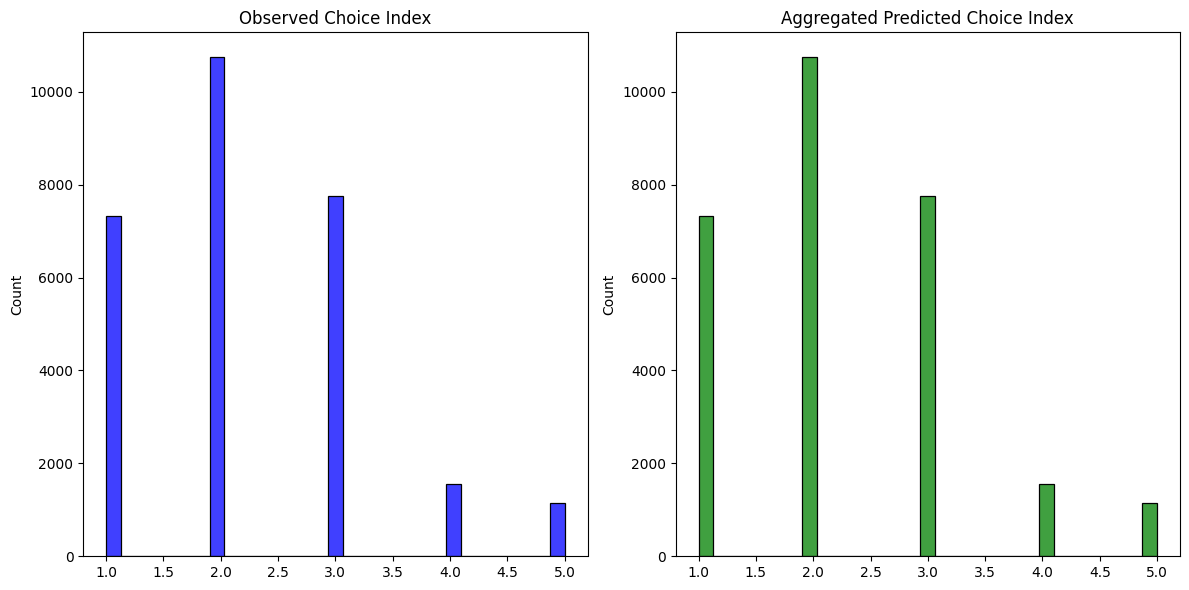

Aggregate Revenue: 13663.126953125
Revenue 95% Confidence Interval: 13663.1318359375 to 13663.1318359375


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp
import numpy as np
from numpyro.infer import Predictive
import jax

def ppc(model, price_jax, choice_index_jax, samples):
    # Generate posterior predictive data
    predictive = Predictive(model, samples)
    posterior_predictive = predictive(jax.random.PRNGKey(1), price_jax, choice_index_jax)
    predicted_choice_index = posterior_predictive['y']

    # Aggregate distribution across all predictions
    aggregated_predictions = jnp.mean(predicted_choice_index, axis=0)
    
    # Compute revenue for each posterior sample
    revenue_samples = jnp.sum(price_jax * predicted_choice_index, axis=1)

    # Aggregate revenue and confidence interval
    aggregated_revenue = jnp.mean(revenue_samples)
    lower_bound, upper_bound = np.percentile(revenue_samples, [2.5, 97.5])

    # Visualization of choice index distribution
    plt.figure(figsize=(12, 6))

    # Histogram of observed data
    plt.subplot(1, 2, 1)
    sns.histplot(choice_index_jax, color='blue')
    plt.title('Observed Choice Index')

    # Histogram of aggregated predicted data
    plt.subplot(1, 2, 2)
    sns.histplot(aggregated_predictions, color='green')
    plt.title('Aggregated Predicted Choice Index')

    plt.tight_layout()
    plt.show()

    # Print revenue and CI
    print(f"Aggregate Revenue: {aggregated_revenue}")
    print(f"Revenue 95% Confidence Interval: {lower_bound} to {upper_bound}")

# Example usage of the function:
ppc(multinomial_logit_model, price_jax, choice_index_jax, samples)


### Variational Bayes

In [63]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import SVI, Trace_ELBO, autoguide
import jax
import jax.numpy as jnp
import numpyro.optim as optim

def multinomial_logit_model(price, choice_index):
    # Model definition remains the same
    alpha_mu = numpyro.sample('alpha_mu', dist.Normal(0,3))
    alpha_sigma = numpyro.sample('alpha_sigma', dist.HalfCauchy(scale=2.5))
    
    beta_mu = numpyro.sample('beta_mu', dist.Normal(0,3))
    beta_sigma = numpyro.sample('beta_sigma', dist.HalfCauchy(scale=2.5))
    
    alpha = numpyro.sample('alpha', dist.Normal(alpha_mu, alpha_sigma))
    beta = numpyro.sample('beta', dist.Normal(beta_mu, beta_sigma))
    
    utilities = alpha + beta * price
    numpyro.sample('y', dist.Categorical(logits=utilities), obs=choice_index)

# Assuming 'data' is your DataFrame
price = data['price'].values
choice_index = data['choice_index'].values
price_jax = jnp.array(price)
choice_index_jax = jnp.array(choice_index)

# Guide for the model
guide = autoguide.AutoNormal(multinomial_logit_model)

# Set up the optimizer
optimizer = optim.Adam(step_size=0.01)

# Set up the SVI object
svi = SVI(multinomial_logit_model, guide, optimizer, loss=Trace_ELBO())

# Run the optimizer
n_steps = 100
svi_state = svi.init(jax.random.PRNGKey(0), price_jax, choice_index_jax)

for step in range(n_steps):
    svi_state, loss = svi.update(svi_state, price_jax, choice_index_jax)
    if step % 100 == 0:
        print(f"Step {step}, ELBO = {loss}")

# Get the approximate posterior
params = svi.get_params(svi_state)

# Access the mean and standard deviation of beta
alpha_mean = params['alpha_auto_loc']
#alpha_std = params['alpha_auto_scale']


beta_mean = params['beta_auto_loc']
#beta_std = params['beta_auto_scale']

# Print the results
print("Posterior mean of alpha:", alpha_mean)
print("Posterior mean of beta:", beta_mean)

Step 0, ELBO = 295746.65625
Posterior mean of alpha: 0.7842133
Posterior mean of beta: -0.45846453


In [ ]:
    

    import arviz as az

    inference_data = az.from_numpyro(mcmc)
    az.plot_trace(inference_data, compact=True, figsize=(15, 25));

# Edward

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed


def mixed_logit_model(N, J, price):
    # Priors for hyperparameters
    mu_alpha = ed.Normal(loc=0., scale=5., name="mu_alpha")
    sigma_alpha = ed.InverseGamma(concentration=2., rate=0.5, name="sigma_alpha")
    mu_beta = ed.Normal(loc=0., scale=5., name="mu_beta")
    sigma_beta = ed.InverseGamma(concentration=2., rate=0.5, name="sigma_beta")

    # Priors for varying intercepts and coefficient
    alpha = ed.Normal(loc=mu_alpha, scale=sigma_alpha, sample_shape=J, name="alpha")
    beta = ed.Normal(loc=mu_beta, scale=sigma_beta, name="beta")

    # Likelihood
    utilities = alpha + tf.reshape(beta * price, (-1, 1))
    y = ed.Categorical(logits=utilities, name="y")

    return y


# Assuming `price` and `choice_index` are your data
model = mixed_logit_model(N, J, price)

# Choose an inference method here (e.g., MCMC, VI)
# Example with Variational Inference
q_alpha = tfp.distributions.Normal(loc=tf.get_variable("q_alpha/loc", [J]),
                                   scale=tf.nn.softplus(tf.get_variable("q_alpha/scale", [J])))
# Define other variational parameters similarly for beta, mu_alpha, etc.

# Run the inference
inference = tfp.vi.fit_surrogate_posterior(target_log_prob_fn=mixed_logit_model,
                                           surrogate_posterior=q_alpha)


# xlogit preprocessing

### Duplicate choices to take account of alternatives

Currently, each 'choice' (including incremental volume purchases) only has one row. We need to duplicate each choice to take account of the $J-1$ alternatives.

In [ ]:
def declare_alternatives(data):
    import pandas as pd

    # Fixed column names
    choice_column = 'product'
    price_column = 'price'
    volume_column = 'volume'

    # Rename the 'product' column to 'choice'
    data = data.rename(columns={choice_column: 'choice'})

    # Calculate the average price for each choice
    avg_price = data.groupby('choice')[price_column].mean()

    # Get the unique choices
    choices = data['choice'].unique()

    # Create a price and volume column for each choice
    for c in choices:
        data[f'price_{c}'] = data.apply(lambda x: x[price_column] if x['choice'] == c else avg_price[c], axis=1)
        data[f'volume_{c}'] = data[volume_column]

    # Drop the original price and volume columns
    data = data.drop(columns=[price_column, volume_column])

    return data

# Example usage
data = declare_alternatives(data)


### Pivot data long

In [ ]:
def make_data_long(data):
    from xlogit.utils import wide_to_long
    import uuid

    # Fixed column names
    id_col = 'id'
    choice = 'choice'

    # Get unique alternatives from the choice column
    alt_list = data[choice].unique().tolist()

    # Convert the data from wide to long format
    data_long = wide_to_long(data, id_col=id_col, alt_list=alt_list, 
                             varying=['price', 'volume'], alt_name='alt', sep='_', alt_is_prefix=False)

    # Assign a unique identifier to each row in the workspace_id column
    data_long[id_col] = [str(uuid.uuid4()) for _ in range(len(data_long))]

    return data_long


# Example usage
data = make_data_long(data)
data.head()


### Declare nests

In [ ]:
def nests(data):
    # Create the 'sales' column based on the condition
    data['nest1'] = data['alt'].apply(lambda x: 1 if x in ['Other'] else 0)
    data['nest2'] = data['alt'].apply(lambda x: 1 if x not in ['Other'] else 0)
    return data

data = nests(data)
data.head()

### Standardize price

Let $P_o$ be the original price, $P_s$ be the standardized price, 
$\mu_o$ be the mean of the original prices, and $\sigma_o$ be the 
standard deviation of the original prices.

The standardization transformation is defined as:
$$ P_s = \frac{P_o - \mu_o}{\sigma_o} $$

To reverse this transformation and recover the original price, the following 
formula is used:
$$ P_o = (P_s \times \sigma_o) + \mu_o $$


In [ ]:
def standardize_price(data):
    import pandas as pd
    
    if 'price' not in data.columns:
        raise ValueError("The 'price' column is not found in the data.")

    mean_price = data['price'].mean()
    std_price = data['price'].std()

    # Avoid division by zero in case of constant price
    if std_price == 0:
        raise ValueError("Standard deviation of 'price' is zero. Cannot standardize a constant variable.")

    old_price_sample = data['price'].iloc[0]  # Take a sample price for comparison
    data['price'] = (data['price'] - mean_price) / std_price
    new_price_sample = data['price'].iloc[0]  # Corresponding standardized price

    # Calculate the scaling factor
    scaling_factor = new_price_sample / old_price_sample if old_price_sample != 0 else 0

    print(f"Mean (mu): {mean_price:.2f}, Standard Deviation (sigma): {std_price:.2f}")
    print(f"Price has been scaled by a factor of: {scaling_factor:.2f}")

    return data, scaling_factor, mean_price, std_price

# Example usage
data, scaling_factor, scaler_mu, scaler_sigma = standardize_price(data)

data.head()


# xlogit estimation

### Mixed logit

In [ ]:
def estimate_mixed_logit_model(data):
    from xlogit import MixedLogit
    varnames = ['price', 'nest1', 'nest2']

    model = MixedLogit()

    model.fit(X = data[varnames], y = data['choice'], varnames=varnames,
              alts=data['alt'], ids=data['id'], avail=data['available'],
              #panels = data['panel'],
              panels = None,
              randvars={'price': 'n'},
              maxiter = 1000, n_draws=3500, 
              num_hess = True,
              fit_intercept=True,
              optim_method='L-BFGS-B')

    model.summary()

    return model

ml_model = estimate_mixed_logit_model(data)

### Prediction with base data

In [ ]:
import pandas as pd
import numpy as np

def predict(model, data, aupa):
    # Create a copy of the data to work with inside the function
    data_copy = data.copy()

    varnames = ['price']

    # Adjust prices for different alternatives in the copy
    #data_copy.loc[data_copy['alt'] == 'Starter', 'price'] = (30 - scaler_mu) / scaler_sigma
    #data_copy.loc[data_copy['alt'] == 'Team', 'price'] = (50 - scaler_mu) / scaler_sigma
    #data_copy.loc[data_copy['alt'] == 'Business', 'price'] = (100 - scaler_mu) / scaler_sigma
    #data_copy.loc[data_copy['alt'] == 'Enterprise', 'price'] = (300 - scaler_mu) / scaler_sigma

    # Generate probabilities
    result = model.predict(X=data_copy[varnames], varnames=varnames, ids=data_copy['id'], alts=data_copy['alt'], return_proba=True)

    # Unpack the tuple if result is a tuple
    if isinstance(result, tuple):
        choices, proba = result
    else:
        proba = result

    # Rescale individual prices in the copy
    data_copy['rescaled_price'] = data_copy['price'] * scaler_sigma + scaler_mu

    # Calculate the average of each column in proba
    avg_proba = np.mean(proba, axis=0)

    # Revenue calculation
    revenue = 0
    for i in range(proba.shape[1]):
        revenue += np.sum(data_copy[data_copy['alt'] == data_copy['alt'].unique()[i]]['rescaled_price'] * avg_proba[i])
    total_revenue = revenue * 12

    # Calculate and print package volume mix and revenue
    print("Package volume mix:")
    alt_names = data_copy['alt'].unique()  # Extract unique alternative names from the copy
    for i, p in enumerate(avg_proba):
        print(f"{alt_names[i]}: {p*100:.0f}%")

    print("\nTotal Revenue: ${:,.0f}".format(total_revenue))

    # Calculate paid volume (excluding 'Other' option)
    paid_volume = len(proba) * sum(avg_proba[alt_names != 'Other'])

    # Calculate paid accounts
    paid_accounts = int(paid_volume / aupa)

    # Calculate ARPA
    arpa = total_revenue / paid_accounts if paid_accounts > 0 else 0
    print("Paid Accounts: ", paid_accounts)
    print("ARPA: ${:,.2f}".format(arpa))
    print()
    print("Paid Seats: ", int(paid_volume))
    print("ARPU: ${:,.2f}".format(total_revenue / paid_volume))

    print("\nn: ", len(proba))

    return avg_proba

# Example usage
proba = predict(ml_model, data, 6.64)


### With new prices
- ID column
- Price column
- Available

Plus we need a row for each alt.


In [ ]:
import pandas as pd
import uuid

def create_dummy(N, prices, names):
    prices = (prices - scaler_mu) / scaler_sigma
    
    # Check if the length of prices and names match
    if len(prices) != len(names):
        raise ValueError("Length of 'prices' and 'names' must be the same.")

    # Create a list of unique IDs
    unique_ids = [str(uuid.uuid4()) for _ in range(N)]

    # Create a list to hold the data for the DataFrame
    data = []

    # Loop through unique IDs and names to create rows
    for uid in unique_ids:
        for name, price in zip(names, prices):
            data.append({'id': uid, 'alt': name, 'price': price})

    # Create the DataFrame
    data_dummy = pd.DataFrame(data)

    return data_dummy

# Example usage:
N = 27556  # Number of unique IDs
prices = (17, 42, 68, 148, 0 )
names = ['Starter', 'Team', 'Business', 'Enterprise', 'Other']  # Alternative product names

# data_dummy = create_dummy(N, prices, names)
data_dummy = create_dummy(N, prices, names)


data_dummy.head()


# Manual prediction


Given $\beta_n$, the probability that person $n$ chooses alternative $i$ is given by the standard logit formula:
$$
L_{ni}(\beta_n) = \frac{e^{\beta_n X_{ni}}}{\sum_{j} e^{\beta_n X_{nj}}}
$$

However, since $\beta_n$ is random and not known, the unconditional choice probability is the integral of this logit formula over the density of $\beta_n$, which we assume is normally distributed with parameters $\mu$ and $\sigma$:
$$
P_{ni} = \int L_{ni}(\beta) f(\beta | \theta) d\beta
$$


Because there is no closed form for the integral that enters the choice probability, we must simulate $P_n$. There are four basic steps to follow:

1. Take a draw from the probability density function that you specified for the 'taste' coefficients. That is, take a draw from $f(\beta | \theta)$ and label the draw $\beta^r$, for $r=1$ representing the first draw.
2. Calculate $L_n(\beta^r)$. (The conditional probability.)
3. Repeat many times, for $r=2, \ldots, R$.
4. Average the results.


Then the formula for the simulation looks like the following,
$$
\tilde{P}_{ni} = \frac{\sum_{r} L_{ni}(\beta^r)}{R}
$$
where $R$ is the total number of draws taken from the distribution, and $r$ is one draw.

Once this is done, you will have a value for the probability of each alternative $i$ for each respondent $n$.

Finally, we average over all $n$ probabilites to get the aggregated share across the entire customer-base.




### Preference shares

In [ ]:
import numpy as np

def simulate_choice_probabilities(prices, choice_constants, mu, sigma, R, N):
    """
    Simulate choice probabilities for a mixed logit model with choice-specific constants,
    standardizing the prices first.

    :param prices: A 2D array of shape (N, num_choices), representing the prices for each choice for each individual.
    :param choice_constants: An array of constants for each choice.
    :param mu: Mean of the normal distribution for the random coefficient beta.
    :param sigma: Standard deviation of the normal distribution for beta.
    :param R: Number of simulation draws.
    :param N: Number of individuals.
    :param scaler_mu: Mean used for standardizing the prices.
    :param scaler_sigma: Standard deviation used for standardizing the prices.
    :return: An array of simulated choice probabilities for each choice.
    """
    num_choices = prices.shape[1]
    simulated_probabilities = np.zeros((N, num_choices))

    for n in range(N):
        # Simulate R draws for the random coefficient
        beta_draws = np.random.normal(mu, sigma, R)

        # Calculate the utility for each choice for each draw, using standardized prices
        utility = choice_constants + beta_draws[:, np.newaxis] * prices[n]
        
        # Calculate conditional choice probabilities for each draw
        exp_utility = np.exp(utility)
        conditional_probs = exp_utility / np.sum(exp_utility, axis=1, keepdims=True)

        # Average over R draws to approximate unconditional choice probability
        simulated_probabilities[n] = np.mean(conditional_probs, axis=0)

    # Aggregate probabilities over all individuals
    aggregated_probabilities = np.mean(simulated_probabilities, axis=0)

    # Print choice probabilities as XX%
    formatted_probabilities = ["{:.0f}%".format(prob * 100) for prob in aggregated_probabilities]
    for prob in formatted_probabilities:
        print(prob)

    return num_choices
    
# Example usage
mu = -2.7352404      # Mean of beta
sigma = 1.6406472   # Standard deviation of beta
R = 1000    # Number of simulation draws
N = 10000     # Number of individuals

prices = np.array([([17, 42, 68, 148, 0] - scaler_mu) / scaler_sigma] * N)  
choice_constants = np.array([2.9618956, -4.9144808, 0, 1.5379867, 2.5918716])  # Constants for each choice

# Simulating choice probabilities
num_choices  = simulate_choice_probabilities(prices, choice_constants, mu, sigma, R, N)




### Substitution patterns

$$
\epsilon_{ni,xm} = -\frac{x_m \beta_m}{P_{ni}} \int L_{ni}(\beta) L_{nj}(\beta) f(\beta) d\beta
$$

Mixed logit does not exhibit independence from irrelevant alternatives (IIA) or the restrictive substitution patterns of logit. The ratio of mixed logit probabilities, $\frac{P_{ni}}{P_{nj}}$, depends on all the data, including attributes of alternatives other than i or j. The denominators of the logit formula are inside the integrals and therefore do not cancel. The percentage change in the probability for one alternative given a percentage change in the $m$th attribute of another alternative is given by $\epsilon_{ni,xm}$. 

This elasticity is different for each alternative $i$. A ten-percent reduction for one alternative need not imply (as with logit) a ten-percent reduction in each other alternative. Rather, the substitution pattern depends on the specification of the variables and mixing distribution, which can be determined empirically.


# Ground truth (base prices)

In [ ]:
data.tail()

In [ ]:
def plot_variability_with_boxplot(data, scaler_mu, scaler_sigma):
    import matplotlib.pyplot as plt
    import numpy as np

    # Reverse the standardization of price
    if 'price' in data.columns:
        data = data.copy()
        data['price'] = (data['price'] * scaler_sigma) + scaler_mu
    else:
        print("The 'price' column is not in the dataset.")
        return

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Plotting the histogram for 'price'
    axes[0].hist(data['price'], bins=20, edgecolor='black', color='blue')
    axes[0].set_title('Histogram of Price')
    axes[0].set_xlabel('Price')
    axes[0].set_ylabel('Frequency')

    # Plotting the bar plot for 'choice' where 'choice' and 'alt' are equal
    if 'choice' in data.columns and 'alt' in data.columns:
        filtered_data = data[data['choice'] == data['alt']]
        choice_counts = filtered_data['choice'].value_counts()
        total = choice_counts.sum()
        percentages = (choice_counts / total) * 100

        bars = axes[1].bar(percentages.index, percentages.values, color='green')

        for bar in bars:
            yval = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom', ha='center')

        axes[1].set_title('Bar Plot of Choice (Choice = Alt)')
        axes[1].set_xlabel('Choice')
        axes[1].set_ylabel('Percentage')

        # Boxplot of price by choice where choice is equal to alt
        boxplot_data = [filtered_data.loc[filtered_data['choice'] == choice, 'price'] for choice in choice_counts.index]
        axes[2].boxplot(boxplot_data, labels=choice_counts.index)
        axes[2].set_title('Boxplot of Price by Choice (Choice = Alt)')
        axes[2].set_xlabel('Choice')
        axes[2].set_ylabel('Price')

        # Print median and mean prices for each choice
        print("Price Summary by Choice:")
        for i, choice in enumerate(choice_counts.index):
            median_price = np.median(boxplot_data[i])
            mean_price = np.mean(boxplot_data[i])
            print(f"{choice} - Median: ${int(median_price)}, Mean: ${int(mean_price)}")
    else:
        print("The 'choice' and/or 'alt' column is not in the dataset.")

    plt.tight_layout()
    plt.show()

# Example usage
plot_variability_with_boxplot(data, scaler_mu, scaler_sigma)


# Intercept Calibration

# Demand curves

# Revenue maximisation (CoBiT)

### Objective function: NOP vs CLV

In the interdependent case, a given product's demand $D_i$ is a function of all other product's prices.


$$\begin{equation}
   \max R = \sum_{i=1}^N p_i \cdot D_i(p_1, p_2, \ldots, p_N)
\end{equation}$$

Optimal prices are when all elements of the revenue Jacobian with respect to each price equal zero.

$$\begin{equation}
    \frac{\partial R}{\partial p_i} = 0 \quad \text{for each} \quad i = 1, 2, \ldots, N
\end{equation}$$


\begin{equation}
    \frac{\partial R}{\partial p_i} = D_i(p_1, \ldots, p_N) + p_i \cdot \frac{\partial D_i(p_1, \ldots, p_N)}{\partial p_i} + \sum_{\substack{j=1 \\ j \neq i}}^N \left( p_j \cdot \frac{\partial D_j(p_1, \ldots, p_N)}{\partial p_i} \right)
\end{equation}




### Nonlinear programming

Marandi, A., & Lurkin, V. (2023). An exact algorithm for the static pricing problem under discrete mixed logit demand. EURO Journal on Computational Optimization, 11, 100073.

https://arxiv.org/pdf/2005.07482.pdf


Yan, Z., Natarajan, K., Teo, C. P., & Cheng, C. (2022). A representative consumer model in data-driven multiproduct pricing optimization. Management Science, 68(8), 5798-5827.

In [ ]:
import pandas as pd
import numpy as np

def predict(prices, model, data, scaler_mu, scaler_sigma, aupa):
    data_copy = data.copy()
    alternatives = ['Starter', 'Team', 'Business', 'Enterprise', 'Other']

    # Adjust prices for different alternatives
    for alt, price in zip(alternatives, prices):
        data_copy.loc[data_copy['alt'] == alt, 'price'] = (price - scaler_mu) / scaler_sigma
    
    varnames = ['price']

    # Generate probabilities
    result = model.predict(X=data_copy[varnames], varnames=varnames, ids=data_copy['id'], alts=data_copy['alt'], return_proba=True)

    if isinstance(result, tuple):
        _, proba = result
    else:
        proba = result

    data_copy['rescaled_price'] = data_copy['price'] * scaler_sigma + scaler_mu
    avg_proba = np.mean(proba, axis=0)

    # Constraint: Max average probability of 'Other' not exceeding 10%
    if avg_proba[-1] > 0.10:
        return 1e9  # Highly undesirable solution

    # Additional Constraint: Starter < Team < Business < Enterprise
    if not (prices[0] < prices[1] < prices[2] < prices[3]):
        return 1e9  # Highly undesirable solution

    revenue = 0
    for i in range(proba.shape[1]):
        revenue += np.sum(data_copy[data_copy['alt'] == alternatives[i]]['rescaled_price'] * avg_proba[i])
    total_revenue = revenue * 12

    paid_volume = len(proba) * sum(avg_proba[:-1])
    paid_accounts = int(paid_volume / aupa)
    arpa = total_revenue / paid_accounts if paid_accounts > 0 else 0

    return -total_revenue  # Negative for optimization


from scipy.optimize import minimize

def optimize_prices(model, data, scaler_mu, scaler_sigma, aupa):
    initial_prices = [13, 35, 61, 141, 0]
    price_bounds = [(10, 30), (20, 50), (50, 80), (100, 300), (0,0)]

    result = minimize(predict, initial_prices, args=(model, data, scaler_mu, scaler_sigma, aupa),
                      bounds=price_bounds, method='L-BFGS-B')

    optimal_prices = result.x
    max_revenue = -result.fun

    print(optimal_prices)
    print(max_revenue)

    return optimal_prices, max_revenue

# Example usage
optimal_prices, max_revenue = optimize_prices(ml_model, data, scaler_mu, scaler_sigma, 6.64)


# Outputs

### Pseudo-lift

**Revenue lift**  
**Customer lift (and churn)**  
**ARPA lift**

### PVM

### Customer-level distributions

### Product-level distributions

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def simulate(intercepts, original_prices, new_prices, beta_mean, beta_std, N, product_names, scaler_mu, scaler_sigma, R=1000):
    num_goods = len(intercepts)

    # Standardize prices
    standardized_original_prices = (original_prices - scaler_mu) / scaler_sigma
    standardized_new_prices = (new_prices - scaler_mu) / scaler_sigma

    def choice_probability(beta_sample, prices):
        utilities = np.array([intercepts[i] + beta_sample * prices[i] for i in range(num_goods)])
        exp_utilities = np.exp(utilities - np.max(utilities))  # Log-Sum-Exp trick
        return utilities, exp_utilities / np.sum(exp_utilities)

    def simulate_individual_shares(prices):
        shares = np.zeros(num_goods)
        utilities_list = []
        choice_probs_list = []

        for _ in range(N):
            avg_shares = np.zeros(num_goods)
            avg_utilities = np.zeros(num_goods)
            avg_choice_probs = np.zeros(num_goods)
            for _ in range(R):
                beta_sample = np.random.normal(beta_mean, beta_std)
                utilities, choice_probs = choice_probability(beta_sample, prices)
                avg_utilities += utilities
                avg_choice_probs += choice_probs
                avg_shares += choice_probs
            avg_utilities /= R
            avg_choice_probs /= R
            avg_shares /= R

            shares += avg_shares
            utilities_list.append(avg_utilities)
            choice_probs_list.append(avg_choice_probs)

        utilities_df = pd.DataFrame(utilities_list, columns=product_names)
        choice_probs_df = pd.DataFrame(choice_probs_list, columns=product_names)
        return shares / N, utilities_df, choice_probs_df

    # Calculate choice shares and revenues
    original_shares, original_utilities_df, original_choice_probs_df = simulate_individual_shares(standardized_original_prices)
    new_shares, new_utilities_df, new_choice_probs_df = simulate_individual_shares(standardized_new_prices)

    original_revenue = N * np.sum(original_shares * original_prices)
    new_revenue = N * np.sum(new_shares * new_prices)

    # Prepare output
    results = {
        "Original Shares": dict(zip(product_names, original_shares)),
        "New Shares": dict(zip(product_names, new_shares)),
        "Original Revenue": original_revenue,
        "New Revenue": new_revenue
    }

    # Print Output (optional)
    print("Simulation Results:")
    print("\nChoice Shares (Original Prices):")
    for product, share in zip(product_names, original_shares):
        print(f"{product}: {share * 100:.0f}%")
    print("\nChoice Shares (New Prices):")
    for product, share in zip(product_names, new_shares):
        print(f"{product}: {share * 100:.0f}%")
    print(f"\nOriginal Revenue: ${original_revenue:,.0f}")
    print(f"New Revenue: ${new_revenue:,.0f}")

    return results, original_utilities_df, original_choice_probs_df, new_utilities_df, new_choice_probs_df

# Example usage
product_names = ['Starter', 'Team', 'Business', 'Enterprise', 'Other']
intercepts = [2.9618956, -4.9144808, 0, 1.5379867, 2.5918716]
original_prices = [17, 43, 75, 226, 0]  # Added a price for 'Other'
new_prices = [17, 43, 75, 226, 0]       # Added a price for 'Other'
beta_mean = -2.7352404
beta_std = 1.6406472
N = 17000

results, original_utilities_df, original_choice_probs_df, new_utilities_df, new_choice_probs_df = simulate(intercepts, original_prices, new_prices, beta_mean, beta_std, N, product_names, scaler_mu, scaler_sigma)
